



# **Aerial Cactus Identification**

In [3]:
!unzip "aerial-cactus-identification.zip"

Archive:  aerial-cactus-identification.zip
  inflating: sample_submission.csv   
  inflating: test.zip                
  inflating: train.csv               
  inflating: train.zip               


In [4]:
!unzip "test.zip"

Archive:  test.zip
   creating: test/
  inflating: test/000940378805c44108d287872b2f04ce.jpg  
  inflating: test/001ee6d8564003107853118ab87df407.jpg  
  inflating: test/0036e44a7e8f7218e9bc7bf8137e4943.jpg  
  inflating: test/0059dfa41de4441fc23b9a4b98ba99cb.jpg  
  inflating: test/008d9fce71c8e03a4c9cdd15ea908573.jpg  
  inflating: test/00e20b0e6d779e7c36cea29710eed88e.jpg  
  inflating: test/00feb0be23ac80f397a55b0ed8502def.jpg  
  inflating: test/0127044dfc88dfaed0118c8764909800.jpg  
  inflating: test/01a840130560403d291c6b7cb3ed6cf3.jpg  
  inflating: test/01c77430f6e5062bfde2427cdd312a39.jpg  
  inflating: test/01cd51bb115fe5c0c37acd8d8800613e.jpg  
  inflating: test/01e890418e216253bf5339ee4c96b65e.jpg  
  inflating: test/02203be3c4fce1e83c3fa6693c0dea39.jpg  
  inflating: test/022092850a5d17c77ccfab20e8ceb651.jpg  
  inflating: test/024b35ae8ae64039f3d5fcda7886e1cc.jpg  
  inflating: test/02b072147b3c4c01b823a760366616be.jpg  
  inflating: test/02bcf5298914cffa4229ffa04a73543c

In [5]:
!unzip "train.zip"

Streaming output truncated to the last 5000 lines.
  inflating: train/8244d4c9261b5eef48f824eb6c1cac22.jpg  
  inflating: train/8299bf72b460c2aa31b2638575f02d15.jpg  
  inflating: train/82d567c499ecaa91b6c2e770133a9b60.jpg  
  inflating: train/83783023acd84a1677b03ab37161d536.jpg  
  inflating: train/83a1badbbcb371fca0e1ab375ee38482.jpg  
  inflating: train/83a2fd5b6da24250c9d36929b92d8682.jpg  
  inflating: train/84d2c6a359eb54ccaf9343fc0751bb57.jpg  
  inflating: train/84e1dd237e748239096c1236206f4e4e.jpg  
  inflating: train/84e7b6b591daef3d2b3b3a1ee6eb172f.jpg  
  inflating: train/84eafaa6b8fe268471959b0fc2b54e5d.jpg  
  inflating: train/85109cfaadc701bb8200f883de99f569.jpg  
  inflating: train/8548824a57e5f3f41f95166e46a94638.jpg  
  inflating: train/855b813539adbea4d30f693990377f29.jpg  
  inflating: train/857a8140c9dd3f7988c1d42bacce2c04.jpg  
  inflating: train/86597916cc0e563d4345b5d619f9d32a.jpg  
  inflating: train/865d921187cebbf5b25d2e13764c14eb.jpg  
  inflating: train/86

### Loading required libraries

In [6]:

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os,cv2
from IPython.display import Image
from keras.preprocessing import image
from keras import optimizers
from keras import layers,models
from keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt
import seaborn as sns
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
print(os.listdir("../content"))

import numpy as np



['.config', 'aerial-cactus-identification.zip', 'sample_submission.csv', 'test', 'train', 'test.zip', 'train.zip', 'train.csv', 'sample_data']


### Setting our directories

In [7]:
train_dir="../content/train"
test_dir="../content/test"
train=pd.read_csv('../content/train.csv')

df_test=pd.read_csv('../content/sample_submission.csv')

## Getting a basic idea

In [8]:
train.head(5)
train.has_cactus=train.has_cactus.astype(str)

In [9]:
print('out dataset has {} rows and {} columns'.format(train.shape[0],train.shape[1]))

out dataset has 17500 rows and 2 columns


In [10]:
train['has_cactus'].value_counts()

1    13136
0     4364
Name: has_cactus, dtype: int64

In [11]:
print("The number of rows in test set is %d"%(len(os.listdir('../content/test'))))

The number of rows in test set is 4000


### Displaying an image

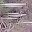

In [12]:
Image(os.path.join("../content/train",train.iloc[0,0]),width=250,height=250)

## Data Augumentation

In [13]:
datagen=ImageDataGenerator(rescale=1./255)
batch_size=150

In [14]:
train_generator=datagen.flow_from_dataframe(dataframe=train[:15001],directory=train_dir,x_col='id',
                                            y_col='has_cactus',class_mode='binary',batch_size=batch_size,
                                            target_size=(150,150))


validation_generator=datagen.flow_from_dataframe(dataframe=train[15000:],directory=train_dir,x_col='id',
                                                y_col='has_cactus',class_mode='binary',batch_size=50,
                                                target_size=(150,150))

Found 15001 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


## Building our model [](#3) <a id="3"></a><br> 

In [15]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
         

### Displaying summary of our network

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

## Compiling our model

In [20]:
from tensorflow import keras
from keras import optimizers
optimizer=keras.optimizers.RMSprop(learning_rate=0.01)

In [22]:
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.RMSprop(),metrics=['acc'])


### Fitting our model 

In [ ]:
epochs=10
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=10,validation_data=validation_generator,validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
100/100 [==============================] - 39s 394ms/step - loss: 0.5635 - acc: 0.8113 - val_loss: 0.2326 - val_acc: 0.9188
Epoch 2/10
100/100 [==============================] - 24s 237ms/step - loss: 0.2046 - acc: 0.9185 - val_loss: 0.1487 - val_acc: 0.9388
Epoch 3/10
100/100 [==============================] - 24s 237ms/step - loss: 0.1487 - acc: 0.9436 - val_loss: 0.2846 - val_acc: 0.9080
Epoch 4/10
100/100 [==============================] - 24s 240ms/step - loss: 0.1286 - acc: 0.9531 - val_loss: 0.2111 - val_acc: 0.9156
Epoch 5/10
100/100 [==============================] - 24s 237ms/step - loss: 0.1029 - acc: 0.9589 - val_loss: 0.1168 - val_acc: 0.9592
Epoch 6/10
100/100 [==============================] - 24s 237ms/step - loss: 0.0864 - acc: 0.9678 - val_loss: 0.1003 - val_acc: 0.9592
Epoch 7/10
100/100 [==============================] - 24s 236ms/step - loss: 0.0872 - acc: 0.9716 - val_loss: 0.1817 - val_acc: 0.9388
Epoch 8

## Evaluating our model[](#4)<a id="4"></a><br>

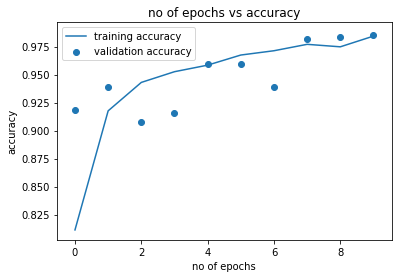

In [ ]:
acc=history.history['acc']  ##getting  accuracy of each epochs
epochs_=range(0,epochs)    
plt.plot(epochs_,acc,label='training accuracy')
plt.xlabel('no of epochs')
plt.ylabel('accuracy')

acc_val=history.history['val_acc']  ##getting validation accuracy of each epochs
plt.scatter(epochs_,acc_val,label="validation accuracy")
plt.title("no of epochs vs accuracy")
plt.legend()

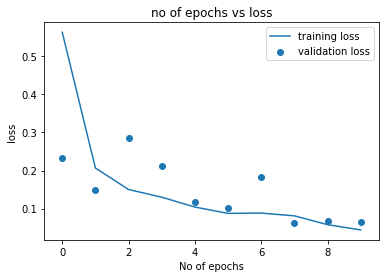

In [ ]:
acc=history.history['loss']    ##getting  loss of each epochs
epochs_=range(0,epochs)
plt.plot(epochs_,acc,label='training loss')
plt.xlabel('No of epochs')
plt.ylabel('loss')

acc_val=history.history['val_loss']  ## getting validation loss of each epochs
plt.scatter(epochs_,acc_val,label="validation loss")
plt.title('no of epochs vs loss')
plt.legend()

## Improving our model using VGG16[](#5)<a id="5"></a><br> 

In [ ]:
model_vg=VGG16(weights='imagenet',include_top=False)
model_vg.summary()

58892288/58889256 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool

### Extracting features using VGG16

In [ ]:
def extract_features(directory,samples,df):
    
    
    features=np.zeros(shape=(samples,4,4,512))
    labels=np.zeros(shape=(samples))
    generator=datagen.flow_from_dataframe(dataframe=df,directory=directory,x_col='id',
                                            y_col='has_cactus',class_mode='other',batch_size=batch_size,
                                            target_size=(150,150))
    i=0
    for input_batch,label_batch in generator:
        feature_batch=model_vg.predict(input_batch)
        features[i*batch_size:(i+1)*batch_size]=feature_batch
        labels[i*batch_size:(i+1)*batch_size]=label_batch
        i+=1
        if(i*batch_size>samples):
            break
    return(features,labels)

train.has_cactus=train.has_cactus.astype(int)
features,labels=extract_features(train_dir,17500,train)
train_features=features[:15001]
train_labels=labels[:15001]

validation_features=features[15000:]
validation_labels=labels[15000:]



Found 17500 images.


### Reshaping our features to feed into our dense layers

In [ ]:
#df_test.has_cactus=df_test.has_cactus.astype(str)
test_features,test_labels=extract_features(test_dir,4000,df_test)

Found 4000 images.


In [ ]:
train_features=train_features.reshape((15001,4*4*512))
validation_features=validation_features.reshape((2500,4*4*512))

test_features=test_features.reshape((4000,4*4*512))


### Define a densely connected network

In [ ]:
model=models.Sequential()
model.add(layers.Dense(212,activation='relu',kernel_regularizer=regularizers.l1_l2(.001),input_dim=(4*4*512)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1,activation='sigmoid'))


In [ ]:
model.compile(optimizer=optimizers.rmsprop(),loss='binary_crossentropy',metrics=['acc'])

In [ ]:
history=model.fit(train_features,train_labels,epochs=30,batch_size=15,validation_data=(validation_features,validation_labels))

Train on 15001 samples, validate on 2500 samples
Epoch 1/30
15001/15001 [==============================] - 5s 352us/step - loss: 1.4906 - acc: 0.8940 - val_loss: 1.2673 - val_acc: 0.8724
Epoch 2/30
15001/15001 [==============================] - 5s 317us/step - loss: 1.1491 - acc: 0.9299 - val_loss: 1.2668 - val_acc: 0.8636
Epoch 3/30
15001/15001 [==============================] - 5s 318us/step - loss: 1.1200 - acc: 0.9368 - val_loss: 1.0743 - val_acc: 0.9672
Epoch 4/30
15001/15001 [==============================] - 5s 330us/step - loss: 1.1101 - acc: 0.9398 - val_loss: 1.0446 - val_acc: 0.9608
Epoch 5/30
15001/15001 [==============================] - 5s 316us/step - loss: 1.1045 - acc: 0.9389 - val_loss: 1.0382 - val_acc: 0.9692
Epoch 6/30
15001/15001 [==============================] - 5s 320us/step - loss: 1.1008 - acc: 0.9397 - val_loss: 1.1922 - val_acc: 0.8924
Epoch 7/30
15001/15001 [==============================] - 5s 317us/step - loss: 1.1012 - acc: 0.9401 - val_loss: 1.1909 - v